In [ ]:
# import os, sys, distutils
# dist = distutils.core.run_setup("./detectron2/setup.py")
# !python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
# sys.path.insert(0, os.path.abspath('./detectron2'))

Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment


In [3]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

from PIL import Image
%matplotlib inline

from densepose import add_densepose_config
from densepose.vis.densepose_results import DensePoseResultsFineSegmentationVisualizer
from densepose.vis.extractor import create_extractor

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.engine import DefaultPredictor

config_fpath = 'densepose-configs/densepose_rcnn_R_50_FPN_s1x.yaml'
model_fpath = './checkpoints/densepose_rcnn_R_50_FPN_s1x.pkl'

cfg = get_cfg()
add_densepose_config(cfg)
cfg.merge_from_file(config_fpath)
cfg.merge_from_list(['MODEL.ROI_HEADS.SCORE_THRESH_TEST', '0.8'])
cfg.MODEL.WEIGHTS = model_fpath
cfg.freeze()

Loaded backend inline version unknown.
Loaded backend Agg version v2.2.


In [4]:
predictor = DefaultPredictor(cfg)

[DetectionCheckpointer] Loading from ./checkpoints/densepose_rcnn_R_50_FPN_s1x.pkl ...
[Checkpointer] Loading from ./checkpoints/densepose_rcnn_R_50_FPN_s1x.pkl ...
Reading a file from 'Detectron2 Model Zoo'


In [ ]:
img = read_image('./data/train/image/00001_00.jpg', 'BGR')
img.shape

tag: Orientation (274) - type: short (3) - value: b'\x00\x01'
tag: XResolution (282) - type: rational (5) Tag Location: 34 - Data Location: 74 - value: b'\x00\x00\x00H\x00\x00\x00\x01'
tag: YResolution (283) - type: rational (5) Tag Location: 46 - Data Location: 82 - value: b'\x00\x00\x00H\x00\x00\x00\x01'
tag: ResolutionUnit (296) - type: short (3) - value: b'\x00\x02'
tag: ExifIFD (34665) - type: long (4) - value: b'\x00\x00\x00Z'


(1024, 768, 3)

In [ ]:
visualizer = DensePoseResultsFineSegmentationVisualizer(cfg=cfg, alpha=1)
extractor = create_extractor(visualizer)

In [ ]:
with torch.no_grad():
    outputs = predictor(img)
data = extractor(outputs['instances'])
out = np.zeros_like(img)
out = visualizer.visualize(out, data)
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
im_out = Image.fromarray(out)

/home/ubu/.pyenv/versions/3.12.7/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


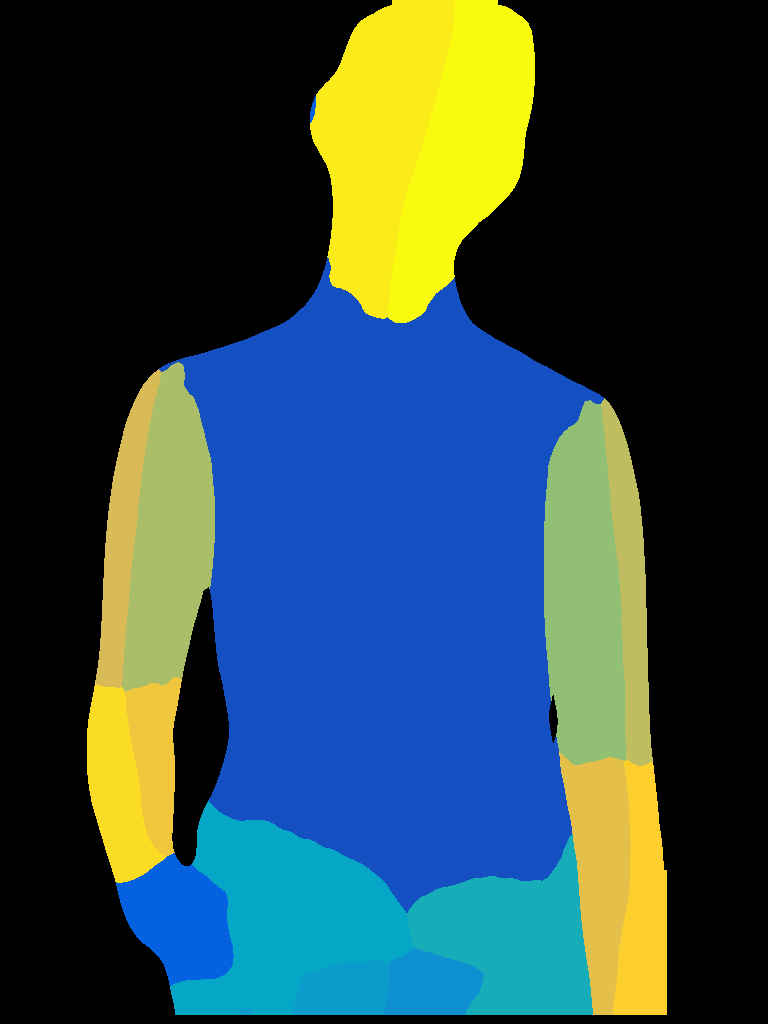

In [ ]:
im_out.show()

In [ ]:
plt.imsave('test_densepose1.jpg', out)

In [ ]:
a = Image.fromarray(out)

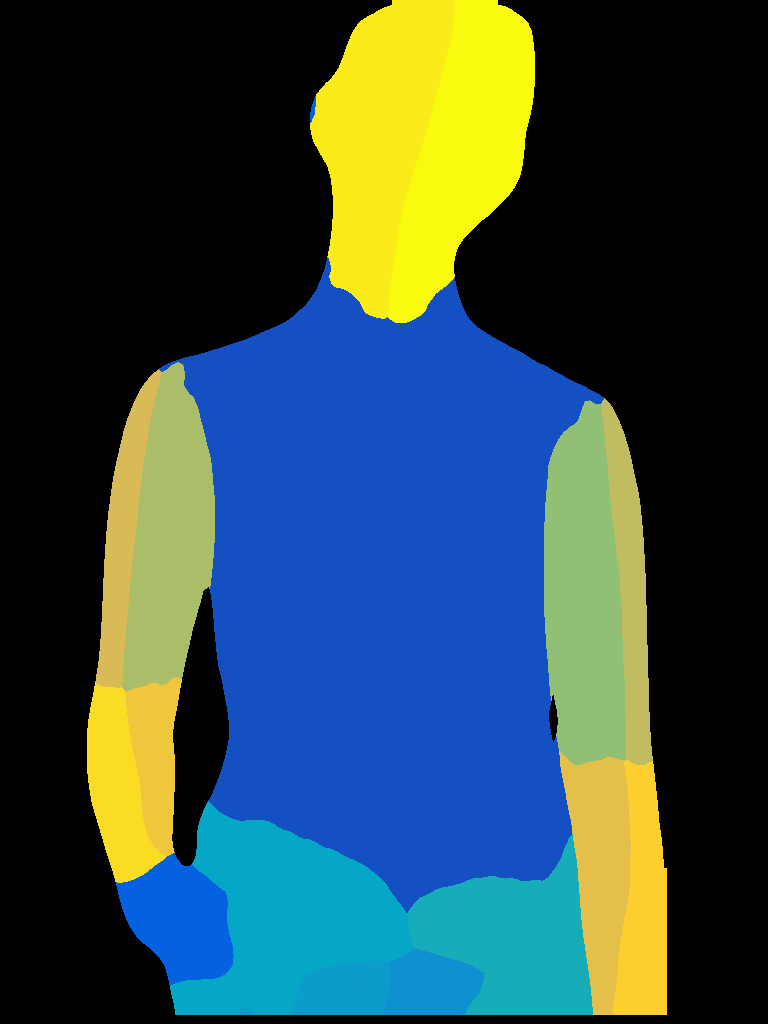

In [ ]:
a

In [ ]:
a.save('a.jpg')